In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab as plt
import warnings
import scipy
from scipy import stats
from sympy import symbols, diff
import math
%matplotlib inline
from scipy.optimize import fsolve
warnings.filterwarnings('ignore')

### 1.	Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [143]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
x = zp
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1 способ: Используем формулы:
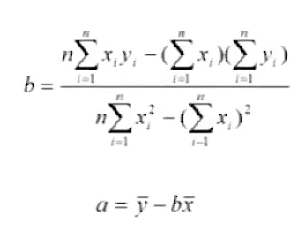

In [4]:
n = 10
b = (n*(x*y).sum()-x.sum()*y.sum())/(n*(x**2).sum()-(x.sum())**2)
b

2.6205388824027653

In [5]:
a = y.mean()- b*x.mean()
a

444.17735732435955

In [6]:
# Посчитаем значения кредитного скоринга по нашей модели
y_hat = 444.1773 + 2.6205*x
y_hat

array([535.8948, 562.0998, 942.0723, 968.2773, 548.9973, 627.6123,
       585.6843, 837.2523, 758.6373, 732.4323])

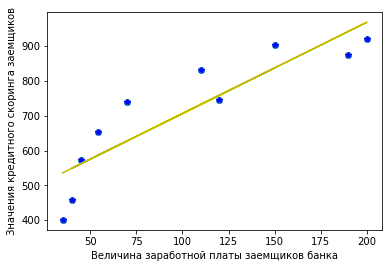

In [7]:
# Построим график
plt.scatter(zp, ks)
plt.xlabel('Величина заработной платы заемщиков банка')
plt.ylabel('Значения кредитного скоринга заемщиков')
plt.plot(zp, ks,'b*', x, 444.18 + 2.62*x,'y')
plt.show()

###### 2 способ: используем МНК:

2.6205388824027653
444.1773573243596


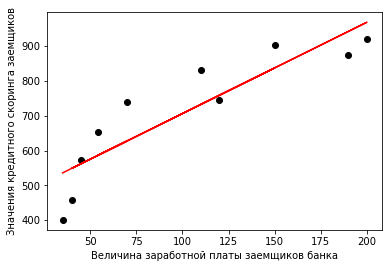

In [8]:
# МНК
xi=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
yi=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n=10
k=(n*(xi*yi).sum()-xi.sum()*yi.sum())/(n*(xi**2).sum()-(xi.sum())**2)
print(k)
b1=(yi.sum()*(xi**2).sum()-(xi*yi).sum()*xi.sum())/(n*(xi**2).sum()-(xi.sum())**2)
print(b1)

Y=k*x+b1

plt.xlabel('Величина заработной платы заемщиков банка')
plt.ylabel('Значения кредитного скоринга заемщиков')
plt.scatter(xi,yi, c='black')
plt.plot(x,Y, c='r')
plt.show()

##### Оценим модель

In [9]:
# найдем коэффициент корреляции с использованием numpy
r = np.corrcoef(zp,ks)
r

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [10]:
# найдем коэффициент корреляции
r = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.std(zp)*np.std(ks))
r

0.8874900920739158

Связи между признаками оцениваются по шкале Чеддока:
0.1 < r < 0.3: слабая;
0.3 < r < 0.5: умеренная;
0.5 < r < 0.7: заметная;
0.7 < r < 0.9: высокая;
0.9 < r < 1: весьма высокая.

В нашем случае (r=0.89) связь между значениями кредитного скоринга и значениями заработной платы высокая.

In [11]:
# Найдем коэффициент детерминации R
R2 = r**2
R2

0.7876386635293676

Коэффициент детерминации близок к 100% (78.76%). Это значит, что 78,76% вариаций можно объяснить зависимостью от величины заработной платы (zp) с использованием нашей регрессионной модели.

In [12]:
#  Найдем среднюю ошибку аппроксимации (среднее отклонение расчетных значений от фактических)
A_sr = 100 * np.mean(np.abs((ks - y_hat) / ks))
A_sr

11.469167115170945

Ошибка апроксимации находится в пределах допустимых значений 8-15% (11%).

In [13]:
# найдем среднюю квадратичную ошибку
mse = ((y-y_hat)**2).sum()/n
mse

6470.414222460003

Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое
значение критерия F_fact. 

Число измерений n = 10, число параметров р = 2 , α = 0,05.

Число степеней свободы df1 = р - 1 =2 - 1 = 1, df2 = n - р = 10 - 2 = 8

In [14]:
df1=1
df2=8
F_fact = (((y_hat-y.mean())**2).sum()/df1) / (((y-y_hat)**2).sum()/df2)
F_fact

29.670760278882085

При 5 % уровне значимости и степенях свободы df1=1 и df2=8 табличное значение критерия F_табл = 4.96.


Так как F_fact=29,67 > F_табл=4,96, подобранная модель ЗНАЧИМАЯ (на уровне значимости 0,05).

Для оценки статистической значимости параметров регрессии воспользуемся t-статистикой Стьюдента и
также рассчитаем доверительные интервалы каждого из показателей. 

При df2=n-р=10-2=8 и α = 0,05 получим 𝑡кр = 2.306.

Определим стандартную ошибку 𝑆 и случайные ошибки ma и mb: 

In [15]:
S = np.sqrt(np.sum((y-y_hat)**2)/(n - 2))
S

89.93340746393969

In [16]:
ma = S*np.sqrt(np.sum(zp**2))/(n*np.std(zp))
ma

56.46649764355006

In [17]:
mb = S/(np.std(zp)*np.sqrt(n))
mb

0.48108279647638064

Вычислим наблюдаемые значения критерия 𝑡a и 𝑡b: 

In [18]:
ta = a/ma
ta

7.866210511731572

In [19]:
tb = b/mb
tb

5.447168141526807

Фактические значения ta=7.87 и tb=5.45 больше табличного значения tкр=2,306, то есть они статистически значимы.


Рассчитаем доверительные интервалы для параметров регрессии a и b. 

Определим предельную ошибку для каждого показателя.

In [20]:
tkp=2.306

In [21]:
delta_a = tkp*ma
delta_a

130.21174356602646

In [22]:
delta_b = tkp*mb
delta_b

1.1093769286745339

Найдем границы доверительных интервалов

In [23]:
min_gamma_a = a-delta_a
min_gamma_a

313.9656137583331

In [24]:
max_gamma_a = a+delta_a
max_gamma_a

574.389100890386

In [25]:
min_gamma_b = b-delta_b
min_gamma_b

1.5111619537282315

In [26]:
max_gamma_b = b+delta_b
max_gamma_b

3.729915811077299

Приходим к выводу о том, что с вероятностью 95% параметры a и b, находятся в указанных границах (313,97 < a < 574.39, 1.51 < b < 3.73) и являются статистически значимыми.


######  3 способ. Посчитаем коэффициенты линейной регрессии, через решение системы уравнений частных производных (по коэффициентам a и b). 


Вот так выглядит формула, с помощью которой мы определим наименьшую сумму квадратов отклонений (ошибки):

ERR(x)=∑(a+b*xi−yi)***2=∑(f(xi)−yi)2→min

где f(xi)= a + b*xi - это функция аппроксимации истинных ответов (то есть посчитанные нами значения кредитного скоринга),

 yi — это истинные ответы (предоставленные в значения кредитного скоринга)

In [27]:
#Вот так выглядит формула, с помощью которой мы определим наименьшую сумму квадратов отклонений (ошибки):
xi, yi, a, b =symbols('xi yi a b')
err_x = (a + b*xi - yi)**2
err_x

(a + b*xi - yi)**2

In [28]:
print(f"Производная первого порядка по a: ", diff(err_x,a))
print(f"Производная первого порядка по b: ", diff(err_x,b))

Производная первого порядка по a:  2*a + 2*b*xi - 2*yi
Производная первого порядка по b:  2*xi*(a + b*xi - yi)


###### через fsolve

a = 444.1773573243596, b = 2.6205388824027653


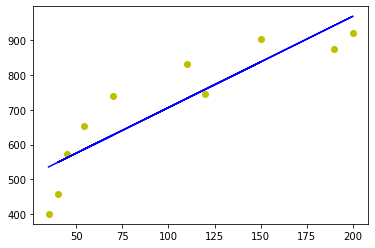

In [30]:
xi = zp
yi = ks
def equations(p):
    a, b = p
    return ((2*xi*(a + b*xi - yi)).sum(), (2*a + 2*b*xi - 2*yi).sum())
a, b = fsolve(equations, (0, 0))
print (f"a = {a}, b = {b}")
x = zp
y=a+b*x
plt.scatter(xi,yi, c='y')
plt.plot(x,y, c='b')

###### через метод Крамера (честно подсмотрела в инете)))) 

In [31]:
#По правилу Крамера найдем общий определитель, а также определители по a и по b, после чего, разделив определитель по a на общий определитель — найдем коэффициент a, аналогично найдем коэффициент b.
# определим функцию для расчета коэффициентов a и b по правилу Крамера
x_us = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_us = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
def Kramer_method (x,y):
    sx = sum(x)
    sy = sum(y)
    list_xy = []
    [list_xy.append(x[i]*y[i]) for i in range(len(x))]
    sxy = sum(list_xy)
        # сумма квадратов значений
    list_x_sq = []
    [list_x_sq.append(x[i]**2) for i in range(len(x))]
    sx_sq = sum(list_x_sq)
        # количество значений
    n = len(x)
        # общий определитель
    det = sx_sq*n - sx*sx
        # определитель по a
    det_a = sx_sq*sy - sx*sxy
        # искомый параметр a
    a = (det_a / det)
        # определитель по b
    det_b = sxy*n - sy*sx
        # искомый параметр b
    b = (det_b / det)
        # контрольные значения (проверка)
    check1 = (n*b + a*sx - sy)
    check2 = (b*sx + a*sx_sq - sxy)
    return [round(a,4), round(b,4)]

# запустим функцию и запишем правильные ответы
ab_us = Kramer_method(x_us,y_us)
a_us = ab_us[0]
b_us = ab_us[1] 
print(f'Оптимальные значения коэффициентов a и b:')
print(f'a = {a_us}')
print(f'b = {b_us}')
print

# определим функцию для подсчета суммы квадратов ошибок
def errors_sq_Kramer_method(answers,x,y):
    list_errors_sq = []
    for i in range(len(x)):
        err = (answers[0] + answers[1]*x[i] - y[i])**2/n
        list_errors_sq.append(err)
    return sum(list_errors_sq)

# запустим функцию и запишем значение ошибки
error_sq = errors_sq_Kramer_method(ab_us,x_us,y_us)
print(f'Сумма квадратов отклонений:')
print (error_sq)

Оптимальные значения коэффициентов a и b:
a = 444.1774
b = 2.6205
Сумма квадратов отклонений:
6470.414221670002


Попробуем аппроксимировать точки с помощью квадратного трехчлена.

In [32]:
xi, yi, a, b, c, d =symbols('xi yi a b c d')
err_x1=(a + b*xi**3 + c*xi**2 + d*xi - yi)**2
err_x1

(a + b*xi**3 + c*xi**2 + d*xi - yi)**2

In [33]:
print(f"Производная первого порядка по a: ", diff(err_x1,a))
print(f"Производная первого порядка по b: ", diff(err_x1,b))
print(f"Производная первого порядка по c: ", diff(err_x1,c))
print(f"Производная первого порядка по d: ", diff(err_x1,d))

Производная первого порядка по a:  2*a + 2*b*xi**3 + 2*c*xi**2 + 2*d*xi - 2*yi
Производная первого порядка по b:  2*xi**3*(a + b*xi**3 + c*xi**2 + d*xi - yi)
Производная первого порядка по c:  2*xi**2*(a + b*xi**3 + c*xi**2 + d*xi - yi)
Производная первого порядка по d:  2*xi*(a + b*xi**3 + c*xi**2 + d*xi - yi)


-177.52827193548552 0.000409381317308962 -0.16748220996082136 22.627951040379443


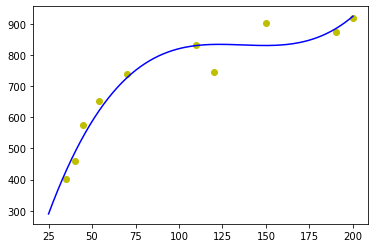

In [36]:
xi = zp
yi = ks
def equations(p):
    a, b, c, d = p
    return ((2*xi*(a+b*xi**3+d*xi+c*xi**2-yi)).sum(), (2*xi**2*(a+b*xi**3+d*xi+c*xi**2-yi)).sum(), (2*xi**3*(a+b*xi**3+d*xi+c*xi**2-yi)).sum(), (2*a+2*b*xi**3+2*d*xi+2*c*xi**2-2*yi).sum())
a, b, c, d = fsolve(equations, (1, 1, 1, 1))
print (a, b, c, d)
x = np.linspace(25, 200, 200)
y=a+b*x**3+c*x**2+d*x
plt.scatter(xi,yi, c='y')
plt.plot(x,y, c='b')

На графике видно, что кубический многочлен описывает модель лучше. Оценим модель. 

Посчитаем значения скорингового балла заемщиков:

In [37]:
y_hat2 = a+b*zp**3+c*zp**2+d*zp
y_hat2

array([426.83653126, 538.88292225, 883.62110157, 923.82407618,
       485.81863805, 726.18326392, 620.46577975, 829.97660592,
       833.49294578, 829.89813532])

In [38]:
#  Найдем среднюю ошибку аппроксимации (среднее отклонение расчетных значений от фактических)
A_sr2 = 100 * np.mean(np.abs((ks - y_hat2) / ks))
A_sr2

4.671192751922036

Ошибка апроксимации находится в пределах допустимых значений 8-15% (4.7%) и достаточно низкая. Это говорит о том, что модель хорошо описывает данные.

In [42]:
# найдем среднюю квадратичную ошибку
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
mse2 = ((y-y_hat2)**2).sum()/n
mse2

1677.7751234883017

Средняя квадратичная ошибка гораздо меньше, чем при линейной регрессии.

Т.о. можно сделать вывод, что кубический многочлен описывает модель лучше.

##### 4 способ (матричный метод) 

In [43]:
zp = zp.reshape((10, 1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [44]:
ks = ks.reshape((10, 1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [45]:
X = np.hstack([np.ones((10,1)), zp])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [47]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ ks)
print(B)

[[444.17735732]
 [  2.62053888]]


Получили такие же коэффициенты, как и с интерсептом

In [48]:
#расчитаем коэффициент без интерсепта
b = np.dot(np.linalg.inv(np.dot(zp.T, zp)), zp.T @ ks)
print(b)

[[5.88982042]]


Построим графики для сравнения

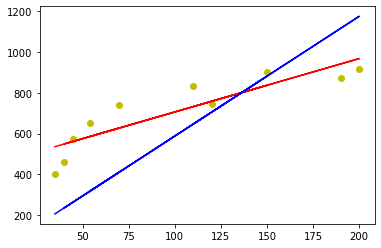

In [56]:
B[0]
b=5.88
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
x = zp
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y = ks
Y1=B[0]+B[1]*x
y2=b*x


plt.scatter(zp, ks, c='y')
plt.plot(x, Y1, c='r')
plt.plot(x, y2, c='b')

###  2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [113]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [114]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [115]:
alpha = 1e-6
alpha

1e-06

In [127]:
def mse_(B3, y = y, X = X, n = 10):
    return np.sum((B3 * X - y)**2)/n

In [133]:
mse = (1/n)*np.sum((B3*X-y)**2)
mse_p = (2/n)*np.sum((B3*X-y)*X)

In [134]:
B3=10

In [136]:
n=10

In [137]:
for i in range(0,500):
    B3 -= alpha * (2/n)*np.sum((B3*X-y)*X)
    if i%20==0:
        print('Iteration: {i}, B3 = {B3}, mse = {mse}'.format(i=i, B3=B3, mse=mse_(B3)))

Iteration: 0, B3 = 9.8867514, mse = 276604.34287384455
Iteration: 20, B3 = 8.175649111659467, mse = 128499.76985273242
Iteration: 40, B3 = 7.197076620784041, mse = 80059.94879955593
Iteration: 60, B3 = 6.637434963810485, mse = 64216.97909375703
Iteration: 80, B3 = 6.317378159495538, mse = 59035.29832694914
Iteration: 100, B3 = 6.134338965197076, mse = 57340.5519462072
Iteration: 120, B3 = 6.029659588918414, mse = 56786.25973402847
Iteration: 140, B3 = 5.969793876221811, mse = 56604.97015585129
Iteration: 160, B3 = 5.935556916812233, mse = 56545.676681338155
Iteration: 180, B3 = 5.915976937942634, mse = 56526.283861545686
Iteration: 200, B3 = 5.904779227072703, mse = 56519.94114908718
Iteration: 220, B3 = 5.898375301432048, mse = 56517.866669884985
Iteration: 240, B3 = 5.8947129222112045, mse = 56517.18818036042
Iteration: 260, B3 = 5.892618422320056, mse = 56516.96627018923
Iteration: 280, B3 = 5.891420586287935, mse = 56516.89369114077
Iteration: 300, B3 = 5.890735548696904, mse = 565

In [139]:
#  Найдем среднюю ошибку аппроксимации (среднее отклонение расчетных значений от фактических)
y_hat3 = B3*X
A_sr3 = 100 * np.mean(np.abs((Y - y_hat3) / Y))
A_sr3

31.581485465219533

Ошибка достаточно высока.

### 3. * (необязательная)Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [152]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [153]:
alpha = 1e-6

In [154]:
def mse(B4, A4, y = ks, X = zp, n = 10):
    return np.sum((B4 * X + A4 - y)**2)/n

Используем производные второго порядка (из 1.3сп)

Производная первого порядка по a:  2*a + 2*b*xi - 2*yi
Производная первого порядка по b:  2*xi*(a + b*xi - yi)

In [157]:
alpha_1 = 1e-5
alpha_2 = 1e-2
B4 = 10
A4 = 400
n = 10
mse_list = []
for i in range(0, 1501):
    A4 -= alpha_2 * np.sum(2*A4 + 2*B4*zp - 2*ks)/n
    for j in range(0, 1501):
        B4 -= alpha_1 * np.sum(2*zp*(A4 + B4*zp - ks))/n

    mse_list.append(mse(B4, A4))
    if i % 100 == 0:
        print(f"Iteration: {i}, B4 = {B4}, A4 = {A4}, mse = {mse(B4, A4)}")

Iteration: 0, B4 = 3.0493456150283818, A4 = 385.918, mse = 7331.391644588601
Iteration: 100, B4 = 2.8783907345768562, A4 = 409.1445976925886, mse = 6781.735686070965
Iteration: 200, B4 = 2.775591433146316, A4 = 423.1113122496693, mse = 6582.985172342536
Iteration: 300, B4 = 2.7137757286358872, A4 = 431.50983527489984, mse = 6511.118823774517
Iteration: 400, B4 = 2.676604451487642, A4 = 436.5600701541949, mse = 6485.132616445485
Iteration: 500, B4 = 2.6542524641443834, A4 = 439.59689844643486, mse = 6475.736244084801
Iteration: 600, B4 = 2.6408116739288485, A4 = 441.42301669577745, mse = 6472.338602696713
Iteration: 700, B4 = 2.632729401921273, A4 = 442.52110573462915, mse = 6471.110046977663
Iteration: 800, B4 = 2.627869336422377, A4 = 443.18141321344666, mse = 6470.665812586094
Iteration: 900, B4 = 2.624946861574781, A4 = 443.57847205945643, mse = 6470.505181536482
Iteration: 1000, B4 = 2.6231895068155153, A4 = 443.81723314009247, mse = 6470.4470988337725
Iteration: 1100, B4 = 2.62213

Численным методом с интерсептом мы получили те же самые коэффициенты, причем средняя квадратичная ошибка тоже близка к расчетной. 

In [158]:
#  Найдем среднюю ошибку аппроксимации (среднее отклонение расчетных значений от фактических)
y_hat4 = B4*X + A4
A_sr4 = 100 * np.mean(np.abs((ks - y_hat4) / ks))
A_sr4

11.469331628584952

Ошибка аппроксимации на уровне предыдущей модели линейной регрессии (1.1сп)